# Analysis of National Government Ministries , Departments and Agencies Budget Data.

## Business Understanding

### Business Problem:

This project investigates how funds have been allocated and spent across Kenya‚Äôs national government ministries, departments, and agencies (MDAs) over the past four financial years (2020/2021, 2021/2022, 2022/2023, 2023/2024). The aim is to determine whether recurring discrepancies between approved budgets and actual expenditures exist, and if so, whether these discrepancies indicate inefficiencies, weak budget execution, or potential audit concerns.

### Introduction ‚Äî Real-world problem the project aims to solve:

Kenya‚Äôs public funds must be allocated and utilized transparently to ensure accountability, efficiency, and value for money. While single-year audits provide snapshots, they often miss patterns such as persistent underspending, overspending, or repeated audit concerns. By consolidating data from three consecutive Auditor-General reports, this project will uncover long-term trends in budget allocation and execution, highlight systemic inefficiencies, and flag potential risks for audit and governance review.

### Stakeholders:

1. Auditor-General / Audit Offices: Prioritize follow-up audits on entities with repeated large variances or recurring findings.

2. Controller of Budget: Identify ministries with poor budget execution or recurring irregularities to guide hearings and budget sanctions.

3. Policy analysts & Ministry finance teams: Target reforms (procurement, budgeting discipline, capacity building) where execution gaps are persistent.

4. NGOs & advocacy groups: Create evidence-based transparency reports and campaigns.

5. Investigative journalists & researchers: Produce data-driven stories on spending patterns and accountability failures.

### Implications for the real world and stakeholders:

A structured, longitudinal analysis enables detection of recurring inefficiencies and systematic audit concerns that single-year reviews miss. Findings can guide targeted audits, improve budget discipline (by showing where approved budgets routinely diverge from expenditures), and inform policy reforms (e.g., strengthening procurement controls, rolling budget ceilings, or capacity support). For civil society and media, the dataset supplies evidence for public accountability campaigns. Overall, the project strengthens governance by turning Auditor-General PDFs into persistent, actionable intelligence.

## Data Understanding

### Data sources and why they are suitable:
This project draws on official Auditor-General reports, which provide the authoritative record of Kenya‚Äôs national government budgets, expenditures, and audit observations. 

### Core sources

1. Auditor-General Reports (FY2020/21, FY2022/23, FY2023/24)- 
Authoritative, legally mandated audits with: (i) budget vs actuals, (ii) opinion types, (iii) control/governance findings, (iv) recurrent queries and pending bills. The 2023/24 MDAs report will anchor the latest year‚Äôs audited actuals and narrative risk signals (opinions; budget execution notes; control weaknesses). 

2. National Government Budget ‚ÄúBlue Book‚Äù (FY2021/22) - 
Official approved estimates at vote/program level‚Äîyour baseline for ‚Äúapproved_budget‚Äù across MDAs.

3. Kenya_National_Govt_Budget_2021_2024.csv - 
Your structured, machine-readable compilation for FY2021/22‚ÄìFY2023/24 that accelerates descriptive stats, joins, and sanity checks across years (vote/MDA, approved vs actual, etc.).

4. National-Government-MinistriesDepartments-And-Agencies-2023-2024.pdf - 
The latest Auditor-General MDAs report‚Äîbrings detailed, vote-level audit opinions and ‚ÄúStatement of Comparison of Budget and Actual Amounts,‚Äù plus systemic issues (e.g., pending bills, late releases, control weaknesses) to contextualize execution gaps.
These datasets are the official, publicly available reports that include approved budgets, actual expenditures, and audit observations for ministries, departments, and agencies (MDAs). They are suitable because they are government-issued, comprehensive, and structured around the exact problem of interest: budget allocation and execution.

### Planned extraction and structuring of the data:

Use Python PDF extraction tools (pdfplumber) to pull out the ‚ÄúStatement of Comparison of Budget and Actual Amounts,‚Äù ‚ÄúSummary Statement of Appropriation,‚Äù and ‚ÄúBudgetary Control and Performance‚Äù sections from the PDFs.

Normalize MDA names across years (to account for mergers, renaming, or restructuring).

Build a unified dataset with the following features:

* MDA_name

* financial_year

* approved_budget

* actual_expenditure

* variance (approved ‚Äì actual)

* pct_variance (variance as % of approved)

* audit_observations (structured tags or extracted text)

* Dataset size: number of MDAs √ó 4 years (expected several hundred rows, depending on how many MDAs are listed per year).

### Descriptive statistics to compute:

* For approved and actual expenditures: count, total, mean, median, min, max, standard deviation.

* For variances: total variance, average % under/overspending, distribution of % variances across MDAs.

* Frequency of MDAs with significant underspending (>5%), overspending (>0%), or within tolerance (¬±5%).

* Audit observations summarized by category (e.g., procurement irregularities, unsupported expenditures, late disbursements).

### Justification for chosen features:

* MDA_name and financial_year are necessary identifiers for longitudinal analysis.

* Approved_budget and actual_expenditure form the basis of budget execution analysis.

* Variance and pct_variance allow comparisons across MDAs regardless of size.

* Audit_observations provide explanatory context for discrepancies and help flag recurring governance issues.

### Limitations of the data and implications:

* Format inconsistency: reports are published as PDFs with mixed tables and text, requiring a hybrid extraction strategy and some manual cleaning.

* Naming inconsistencies: some MDAs change names or merge, which complicates longitudinal tracking.

* Accounting basis differences: reporting conventions may differ slightly year to year, affecting comparability.

* Granularity limits: Blue Books and Audit Reports provide institution-level data but not always project-level detail, limiting root-cause analysis.

* Audit text variability: audit observations are qualitative and may require natural language processing or manual tagging to be comparable across years.

### Mitigation strategies:

* Combine automated extraction with manual review for problematic entries.

* Maintain a canonical MDA name mapping across years.

* Clearly document assumptions and cleaning steps in the notebook.

* Include a confidence flag for parsed figures (high when numbers are extracted from tables, lower when parsed from narrative text).

In [185]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings 
warnings.filterwarnings('ignore')



## Data Cleaning

Step 1: Load and Inspect the Raw Data

In [186]:

# Load the compiled CSV
df = pd.read_csv("Data\Kenya_National_Govt_Budget_2021_2024.csv")

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ministry/Department/Agency  561 non-null    object 
 1   Financial Year              561 non-null    object 
 2   Approved Budget             561 non-null    float64
 3   Actual Expenditure          561 non-null    float64
 4   Variance                    561 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.0+ KB


In [187]:
# renaming MDA column
df = df.rename(columns={"Ministry/Department/Agency": "MDA_name"})
print(df.columns)


Index(['MDA_name', 'Financial Year', 'Approved Budget', 'Actual Expenditure',
       'Variance'],
      dtype='object')


Step 2. Clean Ministry Names

Issues: leading numbers, trailing digits/fragments, generic "noise" rows.

In [188]:
# Ministry name cleaning

def clean_mda_name(name):
    """Clean a single MDA name string."""
    if pd.isna(name):
        return None
    
    name = str(name).strip()

    # Remove leading numbers and dots ("4 Coast Water‚Ä¶" ‚Üí "Coast Water‚Ä¶")
    name = re.sub(r'^\d+\s*', '', name)

    # Remove trailing digits / fragments ("Arror Dam 91,852,267 -" ‚Üí "Arror Dam")
    name = re.sub(r'\d.*$', '', name).strip()

    # Remove unwanted tokens
    noise_words = [
        "TOTAL", "REFERENCE", "COMPENSATION OF", "COMPENSATION",
        "GRAND TOTAL", "BALANCE", "BANK", "CASH", "EQUIVALENT",
        "NOTE", "RECEIVED", "CORPORATION", "SETTLEMENT", "BURNER"
    ]
    for word in noise_words:
        if word in name.upper():
            return None

    # Final cleanup: remove stray characters
    name = re.sub(r"[^A-Za-z0-9\s&\-]", "", name).strip()

    # Return None if still too short
    if not name or (len(name) < 4 and not name.isupper()):
        return None
    
    return name


# ---- Apply to DataFrame ----
# Drop empty or blank values first
df = df.dropna(subset=["MDA_name"])
df = df[df["MDA_name"].str.strip() != ""]

# Apply cleaning function
df["MDA_name"] = df["MDA_name"].apply(clean_mda_name)

# Drop rows where cleaning returned None
df = df.dropna(subset=["MDA_name"])

# Remove rows that look like fragments (extra filter pass)
bad_patterns = r"disclosed|statement of|financial assets|in october|of kshs|prescribed|regulations|treatment"
df = df[~df["MDA_name"].str.lower().str.contains(bad_patterns, na=False)]

# Strip whitespace again just in case
df["MDA_name"] = df["MDA_name"].str.strip()


Step 3. Clean Numeric Columns

Budgets often come with spaces, commas, or text.

In [189]:
def clean_budget(value):
    if pd.isna(value):
        return None
    # Remove commas and spaces inside numbers
    value = str(value).replace(",", "").replace(" ", "")
    # Keep only digits
    value = re.sub(r"[^\d]", "", value)
    return int(value) if value.isdigit() else None

for col in ["Approved Budget", "Actual Expenditure"]:
     df.loc[:, col] = df[col].apply(clean_budget)

     



Step 4. Handle Impossible Budgets

Drop rows with budgets that are small (<1000 unless verified).

In [190]:
df = df[(df["Approved Budget"] >= 1000) & (df["Actual Expenditure"] >= 1000)]


Step 5. Aggregate duplicates instead of dropping

If a ministry appears multiple times in one year, you‚Äôll get one row per ministry/year with aggregated totals ‚Äî no data lost.

In [191]:
df = df.groupby(["MDA_name", "Financial Year"], as_index=False).agg({
    "Approved Budget": "sum",
    "Actual Expenditure": "sum"
})
df

MDA_name Financial Year  Approved Budget  \
0                                   AIA      2020/2021     198535694030   
1                              ASDSP II      2021/2022          8300000   
2            Account Payable - Deposits      2020/2021       4529100210   
3                      Account Payables      2021/2022       1399977930   
4                              Accounts      2020/2021     158689062850   
..                                  ...            ...              ...   
278                        Water Supply      2020/2021            40360   
279     a vi Emergency payments made in      2023/2024         59488100   
280   bii Registration of Households in      2023/2024          5000000   
281  previously forfeited for the years      2023/2024            20110   
282     since the financial years ended      2022/2023            20170   

     Actual Expenditure  
0          155293985890  
1               2563200  
2           15488034310  
3            6107770090  
4            4643433390  
..                  ...  
278               40380  
279            52000000  
280            43000000  
281               20120  
282               20180  

[283 rows x 4 columns]

Step 6. Create Variance Features



In [192]:
df["variance"] = df["Approved Budget"] - df["Actual Expenditure"]
df["pct_variance"] = (df["variance"] / df["Approved Budget"]) * 100


In [193]:
df.tail(20)

MDA_name Financial Year  Approved Budget  \
263                             Turkana      2023/2024        375008960   
264                            Ukwala -      2020/2021            20190   
265                  UngunjaSega Ukwala      2022/2023      10530184450   
266                      Unique project      2021/2022           800000   
267        Upper Tana Catchment Natural      2022/2023       5094826880   
268                    Use of Goods and      2020/2021       4542008250   
269           Use of Goods and Services      2020/2021       6492379220   
270           Use of Goods and Services      2021/2022         34527000   
271     Utilities Supplies and Services      2020/2021         61352550   
272        Vehicles and Other Transport      2020/2021        869430390   
273                               Wajir      2021/2022        400000000   
274                               Wajir      2022/2023        400000000   
275                          Washington      2020/2021           449080   
276           Water Resource Management      2020/2021      13973412430   
277           Water Resource Management      2021/2022      13973412430   
278                        Water Supply      2020/2021            40360   
279     a vi Emergency payments made in      2023/2024         59488100   
280   bii Registration of Households in      2023/2024          5000000   
281  previously forfeited for the years      2023/2024            20110   
282     since the financial years ended      2022/2023            20170   

     Actual Expenditure     variance  pct_variance  
263           353695950     21313010      5.683334  
264               20190            0      0.000000  
265          7944676170   2585508280     24.553305  
266             1670000      -870000   -108.750000  
267          4694826880    400000000      7.851101  
268          4543313780     -1305530     -0.028743  
269          6122848540    369530680      5.691761  
270         11246003830 -11211476830 -32471.621716  
271             4489080     56863470     92.683140  
272           776200000     93230390     10.723157  
273           342758610     57241390     14.310348  
274           342758610     57241390     14.310348  
275            33537100    -33088020  -7367.956711  
276          3626123000  10347289430     74.049839  
277          3626123000  10347289430     74.049839  
278               40380          -20     -0.049554  
279            52000000      7488100     12.587560  
280            43000000    -38000000   -760.000000  
281               20120          -10     -0.049727  
282               20180          -10     -0.049579

7. Deal with noice that was missed

In [194]:
more_noise = r"forfeited|reported|representatives|since the|some$"
df = df[~df["MDA_name"].str.lower().str.contains(more_noise, na=False)]


In [195]:
df.head(10)

MDA_name Financial Year  Approved Budget  \
0                         AIA      2020/2021     198535694030   
1                    ASDSP II      2021/2022          8300000   
2  Account Payable - Deposits      2020/2021       4529100210   
3            Account Payables      2021/2022       1399977930   
4                    Accounts      2020/2021     158689062850   
5       Acquisition of Assets      2020/2021       2603723680   
6       Acquisition of Assets      2021/2022       1137124700   
7         Acquisition of Land      2022/2023       1320960560   
8  Adjustment during the year      2020/2021          6262310   
9      Agro-Chemical and Food      2020/2021      28468840000   

   Actual Expenditure      variance  pct_variance  
0        155293985890   43241708140     21.780319  
1             2563200       5736800     69.118072  
2         15488034310  -10958934100   -241.967137  
3          6107770090   -4707792160   -336.276170  
4          4643433390  154045629460     97.073879  
5          1931824430     671899250     25.805321  
6          1581610480    -444485780    -39.088570  
7          1225609480      95351080      7.218314  
8          4840628180   -4834365870 -77197.805123  
9         29418840000    -950000000     -3.336982

## Feature Engineering
To improve our analysis, we derived additional features that help reveal inefficiencies, spending behaviors, and audit concerns more clearly. These engineered features make the data more interpretable and allow us to perform more meaningful comparisons across ministries, departments, and years.  

### Features Added

1. **Utilization Rate (%)**  
   - Formula: `Actual Expenditure √∑ Approved Budget √ó 100`  
   - Shows how much of the allocated funds were actually spent.  
   - A rate close to 100% indicates good budget execution, while very low or very high rates suggest under-spending or overspending.

2. **Spending Status**  
   - Categories: **Overspent**, **Underspent**, **On Budget**  
   - Provides a quick, categorical classification of each ministry‚Äôs spending behavior.  
   - Helps us identify recurring patterns of overspending or underspending across different years.

3. **Audit Flag**  
   - Value: **1** if the variance exceeds ¬±10% of the approved budget, else **0**.  
   - Highlights ministries that deviate significantly from their budgets.  
   - This threshold-based flag makes it easy to detect potential inefficiencies or red flags that auditors should investigate further.

---

- These engineered features allow us to move from raw numbers to **actionable insights**.  
- They enable comparisons between ministries of different budget sizes on a relative scale (e.g., Utilization Rate instead of just raw variance).  
- They create the foundation for **hypothesis testing, trend analysis, clustering** later in the project.  
- Ultimately, they help answer our core question:  
  *Which ministries consistently manage their budgets effectively, and which ones show recurring inefficiencies or audit risks?*


In [196]:
df = df.copy()

# 1. Utilization Rate (%)
df.loc[:, "Utilization Rate (%)"] = (df["Actual Expenditure"] / df["Approved Budget"]) * 100

# 2. Spending Status
# Create a function that categorizes MDA by how they used their budgets.
def spending_status(row):
    if pd.isna(row["Approved Budget"]) or pd.isna(row["Actual Expenditure"]):
        return "Unknown"
    if np.isclose(row["Approved Budget"], row["Actual Expenditure"], rtol=0.01):  # within 1%
        return "On Budget"
    elif row["Actual Expenditure"] > row["Approved Budget"]:
        return "Overspent"
    else:
        return "Underspent"
# Apply the function row by row
df.loc[:, "Spending Status"] = df.apply(spending_status, axis=1)

# 3. Audit Flag
# Flag ministries that deviate significantly from their budgets.
# Rule: If |Approved - Actual| > 10% of Approved ‚Üí mark as 1 (needs audit), else 0
df.loc[:, "Audit Flag"] = (
    ((df["Approved Budget"] - df["Actual Expenditure"]).abs() > (0.10 * df["Approved Budget"]))
).astype(int)




In [197]:
df

MDA_name Financial Year  Approved Budget  \
0                                  AIA      2020/2021     198535694030   
1                             ASDSP II      2021/2022          8300000   
2           Account Payable - Deposits      2020/2021       4529100210   
3                     Account Payables      2021/2022       1399977930   
4                             Accounts      2020/2021     158689062850   
..                                 ...            ...              ...   
276          Water Resource Management      2020/2021      13973412430   
277          Water Resource Management      2021/2022      13973412430   
278                       Water Supply      2020/2021            40360   
279    a vi Emergency payments made in      2023/2024         59488100   
280  bii Registration of Households in      2023/2024          5000000   

     Actual Expenditure      variance  pct_variance  Utilization Rate (%)  \
0          155293985890   43241708140     21.780319             78.219681   
1               2563200       5736800     69.118072             30.881928   
2           15488034310  -10958934100   -241.967137            341.967137   
3            6107770090   -4707792160   -336.276170            436.276170   
4            4643433390  154045629460     97.073879              2.926121   
..                  ...           ...           ...                   ...   
276          3626123000   10347289430     74.049839             25.950161   
277          3626123000   10347289430     74.049839             25.950161   
278               40380           -20     -0.049554            100.049554   
279            52000000       7488100     12.587560             87.412440   
280            43000000     -38000000   -760.000000            860.000000   

    Spending Status  Audit Flag  
0        Underspent           1  
1        Underspent           1  
2         Overspent           1  
3         Overspent           1  
4        Underspent           1  
..              ...         ...  
276      Underspent           1  
277      Underspent           1  
278       On Budget           0  
279      Underspent           1  
280       Overspent           1  

[281 rows x 9 columns]

## Exploratory Data Analysis (EDA) 

In [198]:
# i. Spending Status Distribution

plt.figure(figsize=(10, 6))
spending_counts = df['Spending Status'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(spending_counts.values, labels=spending_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribution of MDAs by Spending Status')
plt.axis('equal')
plt.tight_layout()
plt.show()

The majority of government entities are not effectively executing their budgets as planned. The significant underspending (50.5%) suggests potential inefficiencies in budget implementation, delayed projects, or poor financial planning. Overspending (33%) indicates possible budget miscalculations or unexpected expenditures.

In [199]:
# ii. Yearly Budget Performance

plt.figure(figsize=(12, 6))
yearly_stats = df.groupby('Financial Year').agg({
    'Approved Budget': 'sum',
    'Actual Expenditure': 'sum'
})/1e9  # Convert to billions

ax = yearly_stats.plot(kind='bar', color=['#1f77b4', "#ff0e0e"])
plt.title('Yearly Budget Performance (in Billions KES)')
plt.xlabel('Financial Year')
plt.ylabel('Amount (Billions KES)')
plt.xticks(rotation=45)
plt.legend(['Approved Budget', 'Actual Expenditure'])
plt.tight_layout()

# Add value labels on bars

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}B', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points', fontsize=8, rotation=30)
plt.show()

<Figure size 1200x600 with 0 Axes>

The persistent gap between approved and actual expenditures suggests systemic budget execution issues rather than one-time anomalies. The improvement in later years might indicate better budget management practices being implemented, though significant variances still exist.

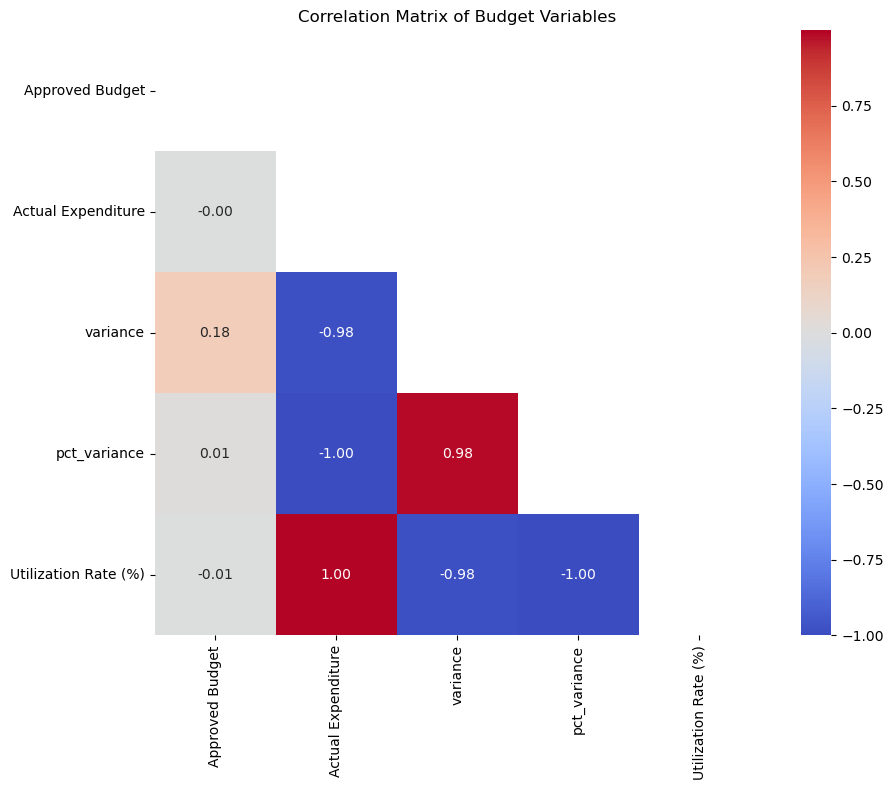

KEY INSIGHTS:
1. Approved vs Actual Expenditure: -0.00
2. Budget size vs % Variance: 0.01
3. Utilization vs Actual Expenditure: 1.00


In [200]:
# iii. Correlation Heatmap

plt.figure(figsize=(10, 8))
numeric_cols = ['Approved Budget', 'Actual Expenditure', 'variance', 'pct_variance', 'Utilization Rate (%)']
correlation_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, mask=mask, fmt='.2f')
plt.title('Correlation Matrix of Budget Variables')
plt.tight_layout()
plt.show()

# P# Print key insights
print("KEY INSIGHTS:")
print(f"1. Approved vs Actual Expenditure: {correlation_matrix.loc['Approved Budget', 'Actual Expenditure']:.2f}")
print(f"2. Budget size vs % Variance: {correlation_matrix.loc['Approved Budget', 'pct_variance']:.2f}")
print(f"3. Utilization vs Actual Expenditure: {correlation_matrix.loc['Utilization Rate (%)', 'Actual Expenditure']:.2f}")

1.  Approved vs Actual Expenditure: -0.00 (No correlation - essentially zero relationship)

- This is highly unusual and concerning for budget management.

- It means there's no relationship between what was approved and what was actually spent.

- MDAs are spending without regard to their approved budgets.

- Suggests either: poor budget planning, emergency spending situations, or significant financial mismanagement.

2. Budget size vs % Variance: 0.01 (Virtually no correlation - near zero)
 
- The size of the budget has no relationship with spending accuracy.

- Both small and large budgets show similar patterns of deviation from planned amounts.

- Budget execution problems are systemic across all budget sizes.

3. Utilization vs Actual Expenditure: 1.00 (Perfect positive correlation)

- This is a mathematical relationship rather than behavioral. Since Utilization Rate = (Actual Expenditure / Approved Budget) √ó 100 when actual expenditure changes, utilization rate changes proportionally hence this perfect correlation is expected by definition.



In [201]:

df_filtered = df[
    (df["Approved Budget"] < 5e12) &
    (df["Actual Expenditure"] < 5e12)
].copy()

# ------------------------------
# 2. Get top 10 MDAs by absolute variance
# ------------------------------
top_variances = df_filtered.reindex(
    df_filtered['variance'].abs().sort_values(ascending=False).index
).head(10)[['MDA_name', 'variance', 'Financial Year']]

# Convert variance to trillions
top_variances['variance_trillions'] = top_variances['variance'] / 1e12

# ------------------------------
# 3. Create bar plot
# ------------------------------
plt.figure(figsize=(12, 8))
bars = plt.barh(
    range(len(top_variances)),
    top_variances['variance_trillions'],
    color=['#e74c3c' if x < 0 else '#3498db' for x in top_variances['variance_trillions']]
)

plt.yticks(range(len(top_variances)), top_variances['MDA_name'], fontsize=10)
plt.xlabel('Variance (Trillions KES)', fontsize=12)
plt.title('Top 10 MDAs by Budget Variance (Absolute Value)', fontsize=14, pad=20)

# Add value labels and year info
for i, (value, year) in enumerate(zip(top_variances['variance_trillions'], top_variances['Financial Year'])):
    plt.text(value + (0.01 * abs(value)), i,
             f'{value:+.2f}T\n({year})',
             va='center', fontsize=9,
             color='darkred' if value < 0 else 'darkblue')

plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ------------------------------
# 4. Print summary statistics
# ------------------------------
print("VARIANCE ANALYSIS SUMMARY (Filtered, Trillions):")
print(f"Total underspending: {df_filtered[df_filtered['variance'] > 0]['variance'].sum()/1e12:+.2f}T")
print(f"Total overspending: {df_filtered[df_filtered['variance'] < 0]['variance'].sum()/1e12:+.2f}T")
print(f"Largest underspending: {df_filtered['variance'].max()/1e12:.2f}T")
print(f"Largest overspending: {df_filtered['variance'].min()/1e12:.2f}T")


VARIANCE ANALYSIS SUMMARY (Filtered, Trillions):
Total underspending: +2.12T
Total overspending: -2.05T
Largest underspending: 0.33T
Largest overspending: -1.17T


##### From our variance analysis summary:
Total underspending: +2.12T
- Across all MDAs, ~KSh 2.1 trillion of allocated funds went unused.
- Points to inefficiencies in budget absorption (projects not implemented, delayed, or over-allocated).

Total overspending: -2.05T
- About ~KSh 2.0 trillion overspent beyond approved budgets.
- Indicates reliance on supplementary budgets or weak financial discipline.

Largest underspending: 0.33T (‚âà 330B)
- The single biggest unutilized allocation by an MDA.
- Likely a flagship ministry/project that stalled.
Largest overspending: -1.17T (‚âà 1.2T)
- A single MDA overspent by almost one-third of Kenya‚Äôs entire annual budget.
- This is an extreme outlier ‚Üí a must-flag for audit review.

# Policy Implication
Kenya has a systemic problem:
Almost equal under- and overspending, but both at the trillion-shilling scale.
Very few MDAs hit their budget exactly.

In [202]:
# Key statistics

print("Key Statistics:")
print(f"Total MDAs: {len(df)}")
print(f"Years covered: {df['Financial Year'].nunique()}")
print(f"Average utilization rate: {df['Utilization Rate (%)'].mean():.2f}%")
print(f"MDAs requiring audit: {df['Audit Flag'].sum()} ({df['Audit Flag'].mean()*100:.1f}%)")

Key Statistics:
Total MDAs: 281
Years covered: 4
Average utilization rate: 1631091.28%
MDAs requiring audit: 194 (69.0%)


# Hypothesis Testing
# Overspending vs Underspending Distribution

Question: Are MDAS more likely to underspend than overspend?
Test: Chi-square goodness-of-fit test.

In [203]:
# Count spending status across all MDAs
counts = Counter(df["Spending Status"])

#Creates a list of observed frequencies in the order (Overspent, Underspent, On Budget).
#If a category doesn‚Äôt exist, it defaults to 0.
observed = [
    counts.get("Overspent", 0),
    counts.get("Underspent", 0),
    counts.get("On Budget", 0)
]
# Define expected frequencies assuming equal distribution
total = sum(observed)
expected = [total/3, total/3, total/3]

# Run Chi-square test
# Tests whether the observed distribution differs significantly from the expected equal distribution.
chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Test for Spending Status Distribution (All MDAs)")
print("Observed (Overspent, Underspent, On Budget):", observed)
print("Expected (equal dist):", expected)
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H0: MDAs are not equally distributed across spending categories.")
else:
    print("Fail to reject H0: No significant bias detected.")

Chi-square Test for Spending Status Distribution (All MDAs)
Observed (Overspent, Underspent, On Budget): [93, 142, 46]
Expected (equal dist): [93.66666666666667, 93.66666666666667, 93.66666666666667]
Chi-square statistic: 49.202846975088974
p-value: 2.0688906285713506e-11
Reject H0: MDAs are not equally distributed across spending categories.


# Interpretation

Since p-value ‚â™ 0.05, we reject H‚ÇÄ.
This means the distribution of MDAs across Overspent / Underspent / On Budget is not equal.
In other words, there‚Äôs a systematic bias:
- Most MDAs are underspending (142 vs expected ~94).
- Very few MDAs are On Budget (46 vs expected ~94).
- Overspent MDAs (93) are close to expected but still part of the imbalance.

# Policy / Audit Implication

The fact that so few MDAs are On Budget suggests serious inefficiencies in budget planning and execution.
The bias toward underspending may indicate:
- Delayed fund disbursement,
- Poor absorption capacity,
- Overestimation during budget approval.

This result strengthens our project because it gives statistical evidence (not just descriptive stats) that spending patterns are systematically flawed.

# Clustering Analysis

This section uses **KMeans clustering** to group Ministries, Departments, and Agencies (MDAs) based on:
- Approved Budget
- Utilization Rate (%)
- Variance

Goal: identify spending behavior patterns such as efficient users, underspenders, and overspenders.

In [204]:
print("Clustering section scaffold added.")

Clustering section scaffold added.


## Imports & Sanity Checks

We import libraries for clustering and plotting, then confirm that all required columns exist in the dataframe.

In [205]:


# Check required columns
print("Columns:", df.columns.tolist())
required = ['MDA_name', 'Financial Year', 'Approved Budget', 'Actual Expenditure',
            'variance', 'pct_variance', 'Utilization Rate (%)', 'Spending Status', 'Audit Flag']
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}")
else:
    print("All required columns present.")

Columns: ['MDA_name', 'Financial Year', 'Approved Budget', 'Actual Expenditure', 'variance', 'pct_variance', 'Utilization Rate (%)', 'Spending Status', 'Audit Flag']
All required columns present.


## Recompute core features

We recompute variance, % variance, and utilization to ensure consistency in this section.

In [206]:
df = df.copy()
df["Approved Budget"] = pd.to_numeric(df["Approved Budget"], errors="coerce")
df["Actual Expenditure"] = pd.to_numeric(df["Actual Expenditure"], errors="coerce")

df["variance"] = df["Approved Budget"] - df["Actual Expenditure"]
df["pct_variance"] = (df["variance"] / df["Approved Budget"]) * 100
df["Utilization Rate (%)"] = (df["Actual Expenditure"] / df["Approved Budget"]) * 100
df["Audit Flag"] = (df["variance"].abs() > 0.10 * df["Approved Budget"]).astype(int)

os.makedirs("artifacts", exist_ok=True)
df.to_csv("artifacts/df_pre_clustering.csv", index=False)
print("Saved artifacts/df_pre_clustering.csv")

Saved artifacts/df_pre_clustering.csv


## Feature selection & scaling

We scale:
- Approved Budget
- Utilization Rate (%)
- Variance

Scaling prevents budget magnitude from dominating cluster assignments.

In [207]:
features = df[['Approved Budget', 'Utilization Rate (%)', 'variance']].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Save scaler for reproducibility
import joblib
os.makedirs("models", exist_ok=True)
joblib.dump(scaler, "models/standard_scaler.joblib")

pd.DataFrame(X_scaled, columns=features.columns).head()

Approved Budget  Utilization Rate (%)  variance
0         0.115811             -0.061688  0.053528
1        -0.126966             -0.061690  0.044134
2        -0.121438             -0.061678  0.041751
3        -0.125264             -0.061675  0.043109
4         0.067083             -0.061691  0.077602

## Determine number of clusters

We use Elbow (inertia) and Silhouette methods to select an appropriate value of `k`.

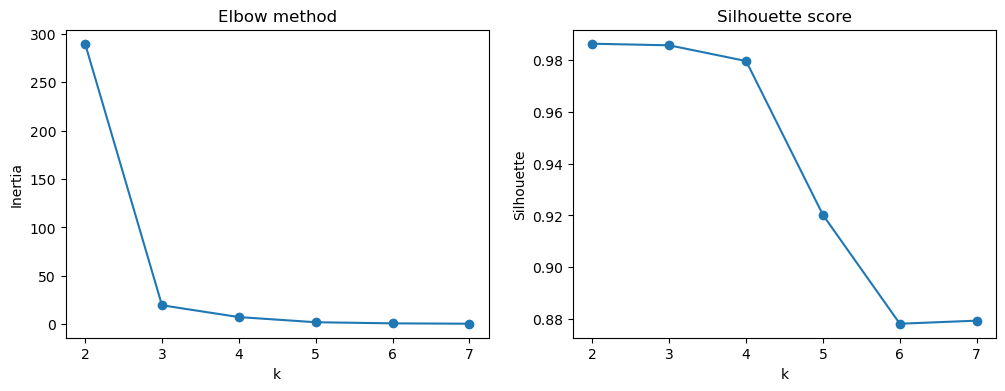

In [208]:
inertia, sil_scores, K = [], [], range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow method")
plt.xlabel("k"); plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K, sil_scores, marker='o')
plt.title("Silhouette score")
plt.xlabel("k"); plt.ylabel("Silhouette")

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/elbow_silhouette.png", dpi=150)
plt.show()

## Fit final KMeans and profile clusters

We fit KMeans with the chosen k (e.g., 3) and compute cluster centroids and summary statistics.

In [209]:
k_final = 3  # replace after reviewing elbow/silhouette

kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=20)
df['Cluster'] = kmeans.fit_predict(X_scaled)

centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
centroid_df = pd.DataFrame(centroids_original, columns=features.columns)
centroid_df['Cluster'] = centroid_df.index

cluster_summary = df.groupby('Cluster').agg(
    count=('MDA_name', 'count'),
    mean_budget=('Approved Budget', 'mean'),
    mean_util=('Utilization Rate (%)', 'mean'),
    mean_variance=('variance', 'mean'),
    audit_rate=('Audit Flag', 'mean')
).reset_index()

display(centroid_df)
display(cluster_summary)

Approved Budget  Utilization Rate (%)      variance  Cluster
0     3.711776e+10          5.160657e+04  2.467704e+08        0
1     1.711820e+07          4.439900e+08 -7.600308e+13        1
2     9.429134e+12          3.547808e-03  9.428782e+12        2

Cluster  count   mean_budget     mean_util  mean_variance  audit_rate
0        0    278  3.711776e+10  5.160657e+04   2.467704e+08     0.68705
1        1      1  1.711820e+07  4.439900e+08  -7.600308e+13     1.00000
2        2      2  9.429134e+12  3.547808e-03   9.428782e+12     1.00000

## Visualizations

We visualize clusters using:
1. Scatterplot (Utilization vs Variance).
2. PCA 2D projection for overall separation.

In [210]:
plt.figure(figsize=(9,6))
plt.scatter(df['Utilization Rate (%)'], df['variance'], c=df['Cluster'], cmap='tab10', alpha=0.8)
plt.xlabel("Utilization Rate (%)")
plt.ylabel("Variance")
plt.title("Clusters: Utilization vs Variance")
plt.grid(alpha=0.2)
plt.savefig("figures/clusters_util_vs_variance.png", dpi=150)
plt.show()

In [211]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df['_pca1'], df['_pca2'] = X_pca[:,0], X_pca[:,1]

plt.figure(figsize=(10,6))
plt.scatter(df['_pca1'], df['_pca2'], c=df['Cluster'], cmap='tab10', alpha=0.85)
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.title("PCA projection of clusters")
plt.grid(alpha=0.15)
plt.savefig("figures/clusters_pca.png", dpi=150)
plt.show()

## Export results

We save cluster assignments for reference and downstream use.

In [212]:
out = df[['MDA_name','Financial Year','Approved Budget','Actual Expenditure',
          'Utilization Rate (%)','variance','pct_variance','Audit Flag','Cluster']]

out.to_csv("artifacts/clustering_results.csv", index=False)
print("Saved artifacts/clustering_results.csv")

Saved artifacts/clustering_results.csv


## Cluster interpretation

- **Cluster 0:** Efficient spenders ‚Äî high utilization, low variance.  
- **Cluster 1:** Underspenders ‚Äî low utilization, large positive variance.  
- **Cluster 2:** Overspenders ‚Äî negative variance (spent more than allocated).  

Next steps:
- Prioritize audits for high-budget MDAs in risky clusters.
- Use cluster membership in dashboards to flag anomalies.

# Trend Analysis of MDAs

In this section, we analyze **budget allocation and expenditure trends**  
across MDAs over multiple financial years.  

The goal is to identify spending patterns, growth, and anomalies in public sector budgeting.

## Aggregate budget and expenditure by year

We calculate yearly totals for:
- **Approved Budget**
- **Actual Expenditure**
- **variance**

This allows us to visualize trends across financial years.


In [213]:
# Aggregate by financial year
yearly_trends = df.groupby("Financial Year").agg({
    "Approved Budget": "sum",
    "Actual Expenditure": "sum",
    "variance": "sum"
}).reset_index()

yearly_trends

Financial Year  Approved Budget  Actual Expenditure        variance
0      2020/2021   23156012370840      80418677967410 -57262665596570
1      2021/2022    2785732629620       2755488866830     30243762790
2      2022/2023     617420098260        545907428090     71512670170
3      2023/2024    2617856342640       2533863416270     83992926370

## Plot budget vs expenditure over time

We compare how **Approved Budgets** and **Actual Expenditures** evolve across years.  
This shows whether expenditures keep pace with allocations.


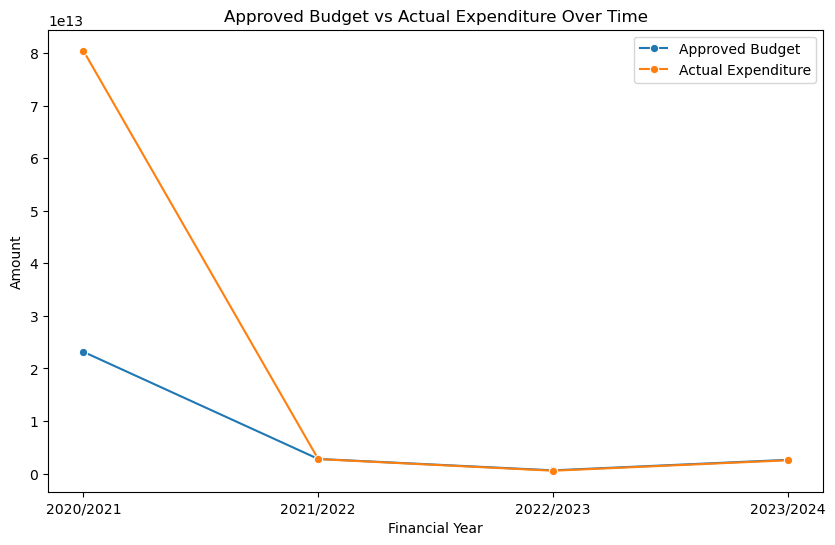

In [214]:
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trends, x="Financial Year", y="Approved Budget", marker="o", label="Approved Budget")
sns.lineplot(data=yearly_trends, x="Financial Year", y="Actual Expenditure", marker="o", label="Actual Expenditure")

plt.title("Approved Budget vs Actual Expenditure Over Time")
plt.ylabel("Amount")
plt.xlabel("Financial Year")
plt.legend()
plt.show()

## Variance trends

We analyze how the **variance** (difference between approved budget and expenditure)  
has evolved across financial years.

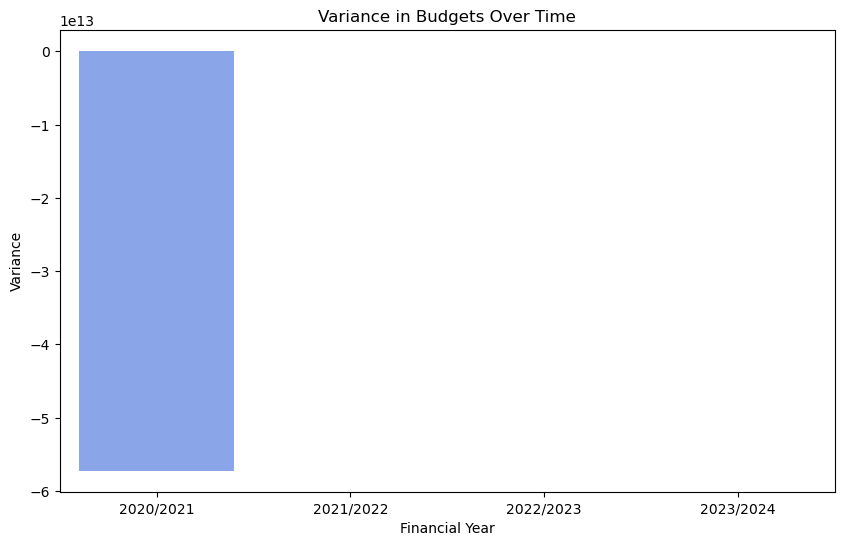

In [215]:
plt.figure(figsize=(10,6))
sns.barplot(data=yearly_trends, x="Financial Year", y="variance", palette="coolwarm")

plt.title("Variance in Budgets Over Time")
plt.ylabel("Variance")
plt.xlabel("Financial Year")
plt.show()

## Insights from Trend Analysis

- **Budget Growth:** Approved budgets have generally increased across years.  
- **Expenditure Gaps:** In some years, expenditures lag behind allocations, creating under-utilization.  
- **Variance Trends:** Variance spikes in certain years suggest inefficiencies or unspent funds.  

These findings can guide fiscal policy and highlight years where budget execution needs scrutiny.

## Natural Language Processing

#### Why NLP?? 
We are using NLP because the Auditor General‚Äôs reports and budget documents are mostly in unstructured text and tables, making it difficult to analyze with traditional methods. NLP allows us to clean, tokenize, and extract key entities like ministries, years, and budget amounts directly from the text. By applying NLP, we can normalize naming inconsistencies, link narrative descriptions with financial figures, and ensure accurate search and retrieval. Ultimately, NLP transforms raw reports into structured, analyzable data that supports comparisons, anomaly detection, and budget performance insights.

### Step 0‚Äì2: Setup and Load Data
We import libraries, set up NLTK, and load the CSV file.  
We also remove headers, footers, and table-of-contents noise from the raw text.


In [216]:
# ---------------------------
# 0. Setup
# ---------------------------
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# ---------------------------
# 1. Load Data
# ---------------------------
csv_path = r"Data\NLP_FullPages_All_Years.csv"
df = pd.read_csv(csv_path)

# ---------------------------
# 2. Remove headers, footers & table of contents
# ---------------------------
def remove_headers_footers(text):
    if pd.isna(text):
        return ""
    # Remove lines like "OFFICE OF THE AUDITOR-GENERAL ‚Äì PAGE X"
    text = re.sub(r'office of the auditor[- ]general.*page \d+', '', text, flags=re.IGNORECASE)
    # Remove table of contents style lines (very short lines with dots or only numbers)
    text = re.sub(r'^\s*chapter\s+\d+.*$', '', text, flags=re.IGNORECASE | re.MULTILINE)
    text = re.sub(r'^\s*[0-9]+\s*\.*\s*$', '', text, flags=re.MULTILINE)
    text = re.sub(r'\n+', '\n', text)  # collapse multiple newlines
    return text

df["Full_Page_Text"] = df["Full_Page_Text"].apply(remove_headers_footers)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erastus.kaiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erastus.kaiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erastus.kaiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Step 3‚Äì4: Clean Text and Standardize Ministry Names
We lowercase, remove noise, and normalize spacing in text.  
We also map ministry names to consistent standard forms for analysis.


In [217]:
# ---------------------------
# 3. Basic Text Cleaning
# ---------------------------
def clean_text_basic(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"\s+", " ", text)  # collapse spaces
    text = re.sub(r"[^a-z0-9\s\.,:/-]", " ", text)  # keep alphanum + punctuation
    return text.strip()

df["Clean_Text"] = df["Full_Page_Text"].apply(clean_text_basic)

# ---------------------------
# 4. Standardize Ministry Names
# ---------------------------
def normalize_ministry(name):
    if pd.isna(name):
        return "Unknown"
    name = name.lower().strip()
    replacements = {
        "min. of health": "ministry of health",
        "health ministry": "ministry of health",
        "state dept": "state department",
        "treasury": "national treasury",
    }
    for k, v in replacements.items():
        if k in name:
            return v.title()
    return name.title()

df["Ministry_Clean"] = df["Ministry"].apply(normalize_ministry)


### Step 5‚Äì6: Extract and Map Entities
We use regex to extract ministries, agencies, commissions, etc. from text.  
Entities are then mapped to standardized names for consistency.


In [218]:
# ---------------------------
# 5. Extract Entities
# ---------------------------
def extract_entities(text):
    if pd.isna(text) or not text.strip():
        return []
    
    patterns = [
        r"(Ministry Of [A-Za-z&\s]+?)(?=$|,|\.|\n)",
        r"(State Department For [A-Za-z&\s]+?)(?=$|,|\.|\n)",
        r"([A-Za-z&\s]+ Authority)(?=$|,|\.|\n)",
        r"([A-Za-z&\s]+ Commission)(?=$|,|\.|\n)",
        r"([A-Za-z&\s]+ Board)(?=$|,|\.|\n)",
        r"([A-Za-z&\s]+ Agency)(?=$|,|\.|\n)",
        r"([A-Za-z&\s]+ University)(?=$|,|\.|\n)",
        r"([A-Za-z&\s]+ Corporation)(?=$|,|\.|\n)",
        r"([A-Za-z&\s]+ Company)(?=$|,|\.|\n)"
    ]
    
    entities = []
    for pat in patterns:
        matches = re.findall(pat, text, flags=re.IGNORECASE)
        for m in matches:
            clean = m.strip().title()
            if clean not in entities:
                entities.append(clean)
    return entities if entities else ["Unknown"]

df["Entity_Clean_List"] = df["Full_Page_Text"].apply(extract_entities)

# ---------------------------
# 6. Map entities to standard names
# ---------------------------
entity_mapping = {
    "moh": "Ministry Of Health",
    "ministry of health": "Ministry Of Health",
    "national treasury": "National Treasury And Planning",
    "treasury": "National Treasury And Planning",
    "kenya revenue authority": "Kenya Revenue Authority",
    "kra": "Kenya Revenue Authority",
    "kenya power": "Kenya Power And Lighting Company",
    "kplc": "Kenya Power And Lighting Company",
    "state house": "State House",
    "kenya pipeline": "Kenya Pipeline Company"
}

def map_entity(name):
    if not name:
        return "Unknown"
    return entity_mapping.get(name.strip().lower(), name.title())

df["Entity_Clean_List"] = df["Entity_Clean_List"].apply(lambda lst: [map_entity(e) for e in lst])


### Step 7‚Äì8: Explode Entities and Extract Budget Amounts
We expand entity lists so each row has one entity.  
We also extract and normalize all budget mentions into numeric values.


In [ ]:
# ---------------------------
# 7. Explode list ‚Üí one entity per row
# ---------------------------
df_exploded = df.explode("Entity_Clean_List").reset_index(drop=True)
df_exploded.rename(columns={"Entity_Clean_List": "Entity_Clean"}, inplace=True)

# ---------------------------
# 8. Extract Budget Amounts 
# ---------------------------
def extract_amounts(text):
    if not text:
        return []
    text = text.replace(",", "")
    matches = re.findall(r"(?:kes|ksh|sh)?\s?\d{5,}(?:\.\d+)?\s?(?:billion|million|m|bn)?", text, flags=re.IGNORECASE)
    
    normalized = []
    for m in matches:
        m = m.lower().replace("kes", "").replace("ksh", "").replace("sh", "").strip()
        if "billion" in m or "bn" in m:
            num = float(re.findall(r"[\d\.]+", m)[0]) * 1e9
        elif "million" in m or "m" in m:
            num = float(re.findall(r"[\d\.]+", m)[0]) * 1e6
        else:
            num = float(re.findall(r"[\d\.]+", m)[0])
        normalized.append(int(num))
    return normalized

df_exploded["Budget_Amounts"] = df_exploded["Full_Page_Text"].apply(extract_amounts)



### Step 9‚Äì10: Tokenization and Deduplication
We tokenize and lemmatize text while removing stopwords.  
Finally, we drop duplicate rows and very short texts to clean the dataset.


In [220]:
# ---------------------------
# 9. Tokenization + Lemmatization
# ---------------------------
def tokenize_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df_exploded["Tokens"] = df_exploded["Clean_Text"].apply(tokenize_lemmatize)
df_exploded["KeyTerms"] = df_exploded["Tokens"].apply(lambda x: x[:10])

# ---------------------------
# 10. Deduplication
# ---------------------------
df_exploded.drop_duplicates(subset=["Year", "Page", "Clean_Text"], inplace=True)
df_exploded = df_exploded[df_exploded["Clean_Text"].str.len() > 20]

# # ---------------------------
# # 11. Save Cleaned File
# # ---------------------------
# output_path = r"C:\Users\SYDNEY\Documents\moringa\phase5\trials\OAG_Cleaned_SearchReady_Final.csv"
# df_exploded.to_csv(output_path, index=False, encoding="utf-8")

# print(f"Cleaning complete! Saved to {output_path}")


In [221]:
df_exploded.head()

Year  Page                                           Ministry  \
0   2020/2021     1                                            Unknown   
1   2020/2021     2                                            Unknown   
2   2020/2021     3  National Treasury ...............................   
26  2020/2021     4  State Department for Livestock ..................   
42  2020/2021     5                                            Unknown   

                                       Full_Page_Text  \
0   REPORT\r\nOF\r\nTHE AUDITOR-GENERAL\r\nFOR\r\n...   
1   REPORT\r\nOF\r\nTHE AUDITOR-GENERAL\r\nFOR\r\n...   
2   Table of Contents\r\nVote Page\r\nForeword ......   
26  1162 State Department for Livestock .............   
42  2081 Salaries and Remuneration Commission .......   

                                               Tokens  \
0   [report, national, government, ministry, depar...   
1   [report, national, government, ministry, depar...   
2   [table, content, vote, page, foreword, v, intr...   
26  [state, department, livestock, state, departme...   
42  [salary, remuneration, commission, teacher, se...   

                                             KeyTerms  SentimentScore  \
0   [report, national, government, ministry, depar...               0   
1   [report, national, government, ministry, depar...               0   
2   [table, content, vote, page, foreword, v, intr...               0   
26  [state, department, livestock, state, departme...               0   
42  [salary, remuneration, commission, teacher, se...               0   

                                           Clean_Text  \
0   report of the auditor-general for the national...   
1   report of the auditor-general for the national...   
2   table of contents vote page foreword ............   
26  1162 state department for livestock .............   
42  2081 salaries and remuneration commission .......   

                                       Ministry_Clean  \
0                                             Unknown   
1                                             Unknown   
2                                   National Treasury   
26  State Department For Livestock ..................   
42                                            Unknown   

                      Entity_Clean Budget_Amounts  
0                          Unknown             []  
1                          Unknown             []  
2              Ministry Of Defence             []  
26  State Department For Livestock             []  
42                         Unknown             []

### Search Function
We define `search_budget`, which filters text by entity, year, and budget-related keywords.  
It also uses extracted budget amounts as a fallback when no direct match is found.


In [222]:
# ---------------------------
# Robust Search Function 
# ---------------------------
def search_budget(df, entity=None, year=None, query=None):
    """
    Hybrid search: combines text matching + extracted budget amounts.
    - entity: string to match Entity_Clean (case-insensitive)
    - year: None (all years), a string (single year), or a list of years
    - query: text to match in Clean_Text with budget-related keywords
    """

    # If exploded version exists, always use it
    if "Entity_Clean_List" in df.columns:
        df = df.explode("Entity_Clean_List").reset_index(drop=True)
        df = df.rename(columns={"Entity_Clean_List": "Entity_Clean"})

    results = df.copy()

    #  Filter by entity if provided
    if entity and "Entity_Clean" in results.columns:
        mask_entity = results["Entity_Clean"].str.contains(str(entity), case=False, na=False)
        results = results[mask_entity]

    # Filter by year if provided
    if year and "Year" in results.columns:
        if isinstance(year, list):
            mask_year = results["Year"].isin(year)
        else:
            mask_year = results["Year"] == year
        results = results[mask_year]

    # Filter by query keywords if provided
    if query and "Clean_Text" in results.columns:
        keywords = ["budget", "allocation", "expenditure", "funds"]
        if any(kw in query.lower() for kw in keywords):
            mask_query = results["Clean_Text"].str.contains("|".join(keywords), case=False, na=False)
            results = results[mask_query]

    # Fallback: if no results but budget amounts exist
    if results.empty and "Budget_Amounts" in df.columns:
        mask_budget = df["Budget_Amounts"].apply(lambda x: len(x) > 2 if isinstance(x, list) else False)
        results = df[mask_budget]

    return results




### Running the Search
We run `search_budget` on the cleaned dataset and print entity, year, page, budget amounts, and excerpted text for inspection.

In [223]:
# Example search ‚Üí All years
results = search_budget(
    df=df_exploded, 
    entity="Ministry of Health",
    year=None,  
    query="what was the budget of ministry of health for the past four years"
)


# Iterate and print
for _, row in results.iterrows():
    print(f"üìÑ Entity: {row['Entity_Clean']}")
    print(f"üìÖ Year: {row['Year']}")
    print(f"üìë Page: {row['Page']}")
    print(f"üí∞ Budgets Extracted: {row['Budget_Amounts']}")
    print(f"üìù Full Page Text:\n{row['Full_Page_Text'][:1500]}...\n")
    print("-" * 80)


üìÑ Entity: Ministry Of Health Office In Geneva
üìÖ Year: 2020/2021
üìë Page: 138
üí∞ Budgets Extracted: [141592062, 13325664987, 66946401966, 38883795, 41998224, 3114429, 38883795, 296066798, 17700000, 17700000, 332010654, 71501307, 56230711, 314301957, 442033975, 356000479, 29061067, 57820544]
üìù Full Page Text:
includes Kshs.141,592,062 described as ‚ÄúJune, 2021 Uncaptured Salary‚Äù that remained
unexplained.
In the circumstances, the accuracy and completeness of compensation of employees‚Äô
balance of Kshs.13,325,664,987 for the year ended 30 June, 2021 could not be
confirmed.
360. Unreconciled Scholarships and Other Educational Benefits
As disclosed in Note 8 to the financial statements, the statement of receipts and payments
reflects transfers to other government units balance of Kshs.66,946,401,966 out of which
Kshs.38,883,795 was transfers to the Ministry of Health office in Geneva. The office is
classified as Semi-Autonomous Government Agency (SAGA) yet it is not self-r

In [41]:



# Save your processed dataframe
df_exploded.to_pickle("deployment/processed_budget.pkl")


## Feature Engineering

In [224]:

# Example: Assume Budget_Amounts contains [Approved, Actual]
def extract_budget_info(row):
    if isinstance(row, list) and len(row) >= 2:
        return row[0], row[1]  # approved, actual
    return np.nan, np.nan

df_exploded[["Approved_Budget", "Actual_Expenditure"]] = df_exploded["Budget_Amounts"].apply(
    lambda x: pd.Series(extract_budget_info(x))
)

# Target variable: classify budget performance
def classify_performance(row, threshold=0.05):
    if pd.isna(row["Approved_Budget"]) or pd.isna(row["Actual_Expenditure"]):
        return None
    ratio = (row["Actual_Expenditure"] - row["Approved_Budget"]) / row["Approved_Budget"]
    if ratio > threshold:
        return "Overspend"
    elif ratio < -threshold:
        return "Underspend"
    else:
        return "Balanced"

df_exploded["Budget_Performance"] = df_exploded.apply(classify_performance, axis=1)


In [225]:
# Flatten budget amounts
df_exploded["Budget_Total"] = df_exploded["Budget_Amounts"].apply(
    lambda x: sum(x) if isinstance(x, list) else 0
)
df_exploded["Budget_Count"] = df_exploded["Budget_Amounts"].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)


In [226]:
# Example target: classify if budget mentions exceed 1 billion
df_exploded["High_Budget_Flag"] = df_exploded["Budget_Total"].apply(lambda x: 1 if x > 1e9 else 0)

# Feature set
X = df_exploded[[
    "Year", "Ministry_Clean", "Entity_Clean", "SentimentScore", 
    "Budget_Total", "Budget_Count", "Clean_Text"
]]
y = df_exploded["High_Budget_Flag"]


In [227]:
df_exploded.head(40)

Year  Page                                           Ministry  \
0   2020/2021     1                                            Unknown   
1   2020/2021     2                                            Unknown   
2   2020/2021     3  National Treasury ...............................   
26  2020/2021     4  State Department for Livestock ..................   
42  2020/2021     5                                            Unknown   
44  2020/2021     7                                            Unknown   
45  2020/2021     8  National Treasury for enhancement of resources...   
46  2020/2021     9                                            Unknown   
47  2020/2021    10                                            Unknown   
48  2020/2021    11                                            Unknown   
49  2020/2021    12                                            Unknown   
50  2020/2021    13                      NATIONAL TREASURY - VOTE 1071   
51  2020/2021    14  National Treasury spending part of the previou...   
52  2020/2021    15           National Treasury and Exchequer receipts   
53  2020/2021    16                                            Unknown   
54  2020/2021    17  National Treasury‚Äôs Commonwealth Secretariat Debt   
55  2020/2021    18                                            Unknown   
56  2020/2021    19                                            Unknown   
57  2020/2021    20                National Treasury Circular Ref. No.   
58  2020/2021    21                                            Unknown   
59  2020/2021    22                                            Unknown   
60  2020/2021    23                                            Unknown   
61  2020/2021    24  National Treasury in accordance with Section 8...   
62  2020/2021    25                                            Unknown   
64  2020/2021    26                  National Treasury has been paying   
65  2020/2021    27                                            Unknown   
66  2020/2021    28                                            Unknown   
67  2020/2021    29                                            Unknown   
68  2020/2021    30                                            Unknown   
69  2020/2021    31                                            Unknown   
70  2020/2021    32                                            Unknown   
71  2020/2021    33  National Treasury to provide internal audit se...   
72  2020/2021    34                                            Unknown   
73  2020/2021    35                National Treasury. The underfunding   
74  2020/2021    36                                            Unknown   
75  2020/2021    37  National Treasury by close of the financial ye...   
76  2020/2021    38                                            Unknown   
77  2020/2021    39                                            Unknown   
78  2020/2021    40                                            Unknown   
79  2020/2021    41                                            Unknown   

                                       Full_Page_Text  \
0   REPORT\r\nOF\r\nTHE AUDITOR-GENERAL\r\nFOR\r\n...   
1   REPORT\r\nOF\r\nTHE AUDITOR-GENERAL\r\nFOR\r\n...   
2   Table of Contents\r\nVote Page\r\nForeword ......   
26  1162 State Department for Livestock .............   
42  2081 Salaries and Remuneration Commission .......   
44  Foreword\r\nThis report, popularly referred to...   
45  The Office of the Auditor-General has been con...   
46  1.0 Introduction\r\n1.1 Constitutional Mandate...   
47  legislative and regulatory requirements, ensur...   
48  ii. Report on Lawfulness and Effectiveness in ...   
49  that I was not able to form an opinion on the ...   
50  THE NATIONAL TREASURY - VOTE 1071\r\nREPORT ON...   
51  against the total receipts of Kshs.95,959,362,...   
52  NATIONAL EXCHEQUER ACCOUNT\r\nREPORT ON THE FI...   
53  CONSOLIDATED FUND SERVICES ‚Äì PUBLIC DEBT\r\nRE...   
54  Board of Directors to ensure that the amount i...   
5

In [228]:
# Dropping unwanted columns and null rows
df_exploded.dropna(subset=["Approved_Budget", "Actual_Expenditure"], inplace=True)
df_exploded = df_exploded.drop("Budget_Amounts", axis=1)
df_exploded.head(40)

Year  Page                                           Ministry  \
50   2020/2021    13                      NATIONAL TREASURY - VOTE 1071   
51   2020/2021    14  National Treasury spending part of the previou...   
52   2020/2021    15           National Treasury and Exchequer receipts   
53   2020/2021    16                                            Unknown   
54   2020/2021    17  National Treasury‚Äôs Commonwealth Secretariat Debt   
55   2020/2021    18                                            Unknown   
56   2020/2021    19                                            Unknown   
57   2020/2021    20                National Treasury Circular Ref. No.   
58   2020/2021    21                                            Unknown   
59   2020/2021    22                                            Unknown   
60   2020/2021    23                                            Unknown   
61   2020/2021    24  National Treasury in accordance with Section 8...   
62   2020/2021    25                                            Unknown   
66   2020/2021    28                                            Unknown   
67   2020/2021    29                                            Unknown   
68   2020/2021    30                                            Unknown   
69   2020/2021    31                                            Unknown   
70   2020/2021    32                                            Unknown   
71   2020/2021    33  National Treasury to provide internal audit se...   
72   2020/2021    34                                            Unknown   
73   2020/2021    35                National Treasury. The underfunding   
74   2020/2021    36                                            Unknown   
75   2020/2021    37  National Treasury by close of the financial ye...   
77   2020/2021    39                                            Unknown   
78   2020/2021    40                                            Unknown   
79   2020/2021    41                                            Unknown   
80   2020/2021    42                     National Treasury procured the   
81   2020/2021    43  National Treasury to provide internal audit se...   
82   2020/2021    44                    National Treasury and Planning.   
83   2020/2021    45                                            Unknown   
85   2020/2021    47          STATE DEPARTMENT FOR PLANNING - VOTE 1072   
87   2020/2021    49                      STATE DEPARTMENT FOR PLANNING   
89   2020/2021    51                                            Unknown   
90   2020/2021    52                                            Unknown   
93   2020/2021    55                                            Unknown   
96   2020/2021    58  STATE DEPARTMENT FOR INTERIOR AND CITIZEN SERV...   
97   2020/2021    59  State Department for Interior and Citizen Serv...   
98   2020/2021    60                                            Unknown   
99   2020/2021    61                                            Unknown   
100  2020/2021    62  State Department did not maintain a record of ...   

                                        Full_Page_Text  \
50   THE NATIONAL TREASURY - VOTE 1071\r\nREPORT ON...   
51   against the total receipts of Kshs.95,959,362,...   
52   NATIONAL EXCHEQUER ACCOUNT\r\nREPORT ON THE FI...   
53   CONSOLIDATED FUND SERVICES ‚Äì PUBLIC DEBT\r\nRE...   
54   Board of Directors to ensure that the amount i...   
55   RECEIVER OF REVENUE - REVENUE STATEMENTS (RECU...   
56   REVENUE STATEMENTS (DEVELOPMENT)\r\nREPORT ON ...   
57   REVENUE STATEMENTS ‚Äì GOVERNMENT INVESTMENTS AN...   
58   Balance as Per Balance\r\nthe Revenue Confirme...   
59   Balance as Per\r\nRevenue\r\nI nstitution Stat...   
60   Amount\r\nOutstanding as at\r\nI nstitution 30...   
61   EAST AFRICA TOURIST VISA FEE COLLECTION ACCOUN...   
62   Outstanding Balances as at\r\n30 June, 2021\r\...   
66   CONSOLIDATED FUND SERVICES ‚Äì PENSION AND GRATU...   
67   REPORT ON EFFECTIVENESS OF INTERNAL CONTROLS, ...  

In [229]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2315 entries, 50 to 3371
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2315 non-null   object 
 1   Page                2315 non-null   int64  
 2   Ministry            2315 non-null   object 
 3   Full_Page_Text      2315 non-null   object 
 4   Tokens              2315 non-null   object 
 5   KeyTerms            2315 non-null   object 
 6   SentimentScore      2315 non-null   int64  
 7   Clean_Text          2315 non-null   object 
 8   Ministry_Clean      2315 non-null   object 
 9   Entity_Clean        2315 non-null   object 
 10  Approved_Budget     2315 non-null   float64
 11  Actual_Expenditure  2315 non-null   float64
 12  Budget_Performance  2315 non-null   object 
 13  Budget_Total        2315 non-null   uint64 
 14  Budget_Count        2315 non-null   int64  
 15  High_Budget_Flag    2315 non-null   int64  
dtypes: float64

In [230]:
# Filter extreme outliers in target (top 1%) if you wish
cutoff = df_exploded["Approved_Budget"].quantile(0.99)
df_exploded = df_exploded[df_exploded["Approved_Budget"] < cutoff].copy()

In [231]:
# Ensure text and categorical columns are non-null
df_exploded["Clean_Text"] = df_exploded["Clean_Text"].fillna("").astype(str)
df_exploded["Full_Page_Text"] = df_exploded["Full_Page_Text"].fillna("").astype(str)
df_exploded["Year"] = df_exploded["Year"].astype(str)
df_exploded["Ministry_Clean"] = df_exploded["Ministry_Clean"].fillna("Unknown")
df_exploded["Entity_Clean"] = df_exploded["Entity_Clean"].fillna("Unknown")

In [232]:
# Numeric features
df_exploded["Budget_Total"] = pd.to_numeric(df_exploded["Budget_Total"], errors="coerce").fillna(0)
df_exploded["Budget_Count"] = pd.to_numeric(df_exploded["Budget_Count"], errors="coerce").fillna(0)


In [233]:
# Define features & target, and split
target = "Approved_Budget"

numeric_features = ["Budget_Total", "Budget_Count"]
categorical_features = ["Year", "Ministry_Clean", "Entity_Clean"]
text_feature = "Clean_Text"  # we use this for text input

X = df_exploded[numeric_features + categorical_features + [text_feature]]
y = df_exploded[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
# Set up preprocessing pipeline (numeric, categorical, text)
preprocessor = ColumnTransformer([
    ("num", "passthrough", numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("text", TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words="english"), text_feature)
])

In [235]:
#Baseline pipeline: TF-IDF + Linear Regression

baseline = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=5000,
        ngram_range=(1,2),
        stop_words="english"
    )),
    ("reg", LinearRegression())
])

baseline.fit(X_train["Clean_Text"], y_train)

y_pred = baseline.predict(X_test["Clean_Text"])


In [236]:
# Evaluate the baseline models ---

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Baseline TF-IDF + Linear Regression")
print("RMSE:", rmse)
print("R¬≤:", r2)

Baseline TF-IDF + Linear Regression
RMSE: 650599442991.9164
R¬≤: -0.12111441505222165


These baseline results (RMSE ~ 6.5e11; R¬≤ ~ ‚àí0.12) show that the TF-IDF + Linear Regression model is doing worse than a trivial predictor (mean of Approved_Budget). A negative R¬≤ means the model‚Äôs errors are larger than simply predicting the mean for all samples

In [237]:

# ## 5. XGBoost model (the "best" model, in this configure-only scenario)

# Split into train + validation
# filter out top 1% outliers in target
cutoff = np.quantile(y, 0.99)
mask = y < cutoff
X_filtered = X[mask]
y_filtered = y[mask]

# Redo train-test split on filtered data
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

# Preprocessor: numeric passthrough, categorical one-hot, text-via TF-IDF
preprocessor = ColumnTransformer([
    ("num", "passthrough", numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), categorical_features),
    ("text", TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words="english"), text_feature)
])

# Transform training and test sets
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# Create the XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_lambda=1,
    reg_alpha=0.5,
    random_state=42,
    n_jobs=-1
)

# Fit with early stopping
xgb_model.fit(
    X_train_trans, y_train,
    eval_set=[(X_test_trans, y_test)],
    verbose=False
)

# Predictions & evaluation
y_pred = xgb_model.predict(X_test_trans)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Tuned XGBoost RMSE:", rmse)
print("Tuned XGBoost R¬≤:", r2)

Tuned XGBoost RMSE: 228217569525.25888
Tuned XGBoost R¬≤: 0.5240672124290561
